### Import Libraries



In [1183]:
import os
import pandas as pd
import numpy as np
import numpy
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier 

#Metrics packages
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score 
import warnings
from sklearn.metrics import precision_score, recall_score, make_scorer, accuracy_score
warnings.filterwarnings("ignore")

In [1184]:
#Convert the data in csv.file
training_SetA = pd.read_csv("df1.csv",sep="|")
training_SetB = pd.read_csv("df2.csv",sep ="|")
#concat in one dataframe
dataframe_all = pd.concat([training_SetA, training_SetB],axis =0)

In [1185]:
dataframe_all.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,1,0
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,3,0
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,4,0
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,5,0


In [1186]:
dataframe_all.shape
# We have received 42543 Patients with 41 features for each patient

(42543, 41)

In [1187]:
dataframe_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42543 entries, 0 to 38876
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HR                37429 non-null  float64
 1   O2Sat             36453 non-null  float64
 2   Temp              14602 non-null  float64
 3   SBP               36507 non-null  float64
 4   MAP               36387 non-null  float64
 5   DBP               35197 non-null  float64
 6   Resp              33893 non-null  float64
 7   EtCO2             3180 non-null   float64
 8   BaseExcess        468 non-null    float64
 9   HCO3              376 non-null    float64
 10  FiO2              1368 non-null   float64
 11  pH                1272 non-null   float64
 12  PaCO2             1191 non-null   float64
 13  SaO2              857 non-null    float64
 14  AST               729 non-null    float64
 15  BUN               2441 non-null   float64
 16  Alkalinephos      726 non-null    float6

In [1188]:
dataframe_all.isnull().sum()

HR                   5114
O2Sat                6090
Temp                27941
SBP                  6036
MAP                  6156
DBP                  7346
Resp                 8650
EtCO2               39363
BaseExcess          42075
HCO3                42167
FiO2                41175
pH                  41271
PaCO2               41352
SaO2                41686
AST                 41814
BUN                 40102
Alkalinephos        41817
Calcium             39710
Chloride            41952
Creatinine          40149
Bilirubin_direct    42457
Glucose             33424
Lactate             41679
Magnesium           40390
Phosphate           41155
Potassium           39157
Bilirubin_total     41826
TroponinI           41854
Hct                 39876
Hgb                 39952
PTT                 41949
WBC                 40234
Fibrinogen          42283
Platelets           40235
Age                     0
Gender                  0
Unit1               13138
Unit2               13138
HospAdmTime 

In [1189]:
Counter(dataframe_all['SepsisLabel'])
#Target value

Counter({0: 41839, 1: 704})

In [1190]:
#the percentage of the nan values
NaN_Values = dataframe_all.loc[:, dataframe_all.columns != 'SepsisLabel'].isnull().sum() * 100 / len(dataframe_all)
print(NaN_Values)


HR                  12.020779
O2Sat               14.314928
Temp                65.677080
SBP                 14.187998
MAP                 14.470066
DBP                 17.267236
Resp                20.332370
EtCO2               92.525210
BaseExcess          98.899937
HCO3                99.116188
FiO2                96.784430
pH                  97.010084
PaCO2               97.200480
SaO2                97.985568
AST                 98.286440
BUN                 94.262276
Alkalinephos        98.293491
Calcium             93.340855
Chloride            98.610817
Creatinine          94.372752
Bilirubin_direct    99.797852
Glucose             78.565216
Lactate             97.969114
Magnesium           94.939238
Phosphate           96.737419
Potassium           92.040994
Bilirubin_total     98.314646
TroponinI           98.380462
Hct                 93.731049
Hgb                 93.909691
PTT                 98.603766
WBC                 94.572550
Fibrinogen          99.388854
Platelets 

In [1191]:
#all columns with more than 70 % nan values are deleted
drop_columns_70_nanvalues = NaN_Values[NaN_Values>70].keys()
dataframe_cleaned = dataframe_all.drop(drop_columns_70_nanvalues, axis=1)

In [1192]:
dataframe_cleaned.isnull().sum()


HR              5114
O2Sat           6090
Temp           27941
SBP             6036
MAP             6156
DBP             7346
Resp            8650
Age                0
Gender             0
Unit1          13138
Unit2          13138
HospAdmTime        0
ICULOS             0
SepsisLabel        0
dtype: int64

In [1193]:
dataframe_cleaned.shape

(42543, 14)

In [1194]:
#we check the skewness to be sure how to impute the values
dataframe_cleaned.skew()

HR              0.385559
O2Sat          -3.788906
Temp           -0.076644
SBP             0.558407
MAP             0.905256
DBP             0.925823
Resp            1.021102
Age            -0.336120
Gender         -0.232914
Unit1           0.098953
Unit2          -0.098953
HospAdmTime   -10.757842
ICULOS          3.998531
SepsisLabel     7.579662
dtype: float64

In [1195]:
#impute all the skewed values with the median
dataframe_cleaned.fillna(dataframe_cleaned["O2Sat"].median(),inplace=True)
dataframe_cleaned.fillna(dataframe_all["HospAdmTime"].median(),inplace=True)
dataframe_all.fillna(dataframe_all["Resp"].median(),inplace=True)
dataframe_all.fillna(dataframe_all["ICULOS"].median(),inplace=True)


In [1196]:
dataframe_cleaned.skew()

HR              0.161759
O2Sat          -4.148418
Temp           -0.661193
SBP             0.732922
MAP             0.608630
DBP             0.451572
Resp            1.409984
Age            -0.336120
Gender         -0.232914
Unit1           0.827376
Unit2           0.827376
HospAdmTime   -10.757842
ICULOS          3.998531
SepsisLabel     7.579662
dtype: float64

In [1197]:
dataframe_all = dataframe_cleaned 

In [1198]:
dataframe_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42543 entries, 0 to 38876
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HR           42543 non-null  float64
 1   O2Sat        42543 non-null  float64
 2   Temp         42543 non-null  float64
 3   SBP          42543 non-null  float64
 4   MAP          42543 non-null  float64
 5   DBP          42543 non-null  float64
 6   Resp         42543 non-null  float64
 7   Age          42543 non-null  float64
 8   Gender       42543 non-null  int64  
 9   Unit1        42543 non-null  float64
 10  Unit2        42543 non-null  float64
 11  HospAdmTime  42543 non-null  float64
 12  ICULOS       42543 non-null  int64  
 13  SepsisLabel  42543 non-null  int64  
dtypes: float64(11), int64(3)
memory usage: 4.9 MB


In [1199]:
Counter(dataframe_all['SepsisLabel'])

Counter({0: 41839, 1: 704})

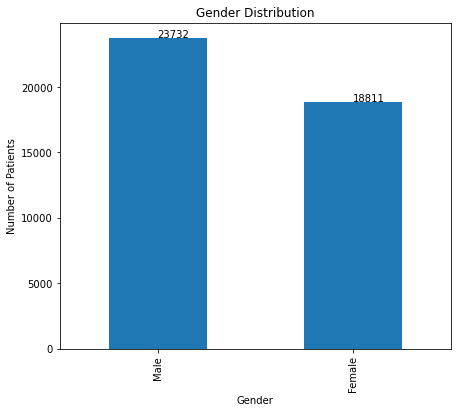

In [1200]:
# Plotting the class distribution
Gender = dataframe_all['Gender'].value_counts()
plt.figure(figsize=(7, 6))
axe = Gender.plot(kind='bar')
for x in axe.patches:
    x_axe = x.get_x() + x.get_width() / 2
    y_axe = x.get_height()
    axe.annotate(format(y_axe), (x_axe, y_axe), xytext=(0, 1), textcoords="offset points")    
axe.set_xticklabels(('Male', 'Female'))
axe.set_xlabel('Gender')
axe.set_ylabel('Number of Patients')
axe.set_title("Gender Distribution", y = 1)  
plt.savefig('Gender_Disstribution.png')
plt.show()

In [1201]:
dataframe_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42543 entries, 0 to 38876
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HR           42543 non-null  float64
 1   O2Sat        42543 non-null  float64
 2   Temp         42543 non-null  float64
 3   SBP          42543 non-null  float64
 4   MAP          42543 non-null  float64
 5   DBP          42543 non-null  float64
 6   Resp         42543 non-null  float64
 7   Age          42543 non-null  float64
 8   Gender       42543 non-null  int64  
 9   Unit1        42543 non-null  float64
 10  Unit2        42543 non-null  float64
 11  HospAdmTime  42543 non-null  float64
 12  ICULOS       42543 non-null  int64  
 13  SepsisLabel  42543 non-null  int64  
dtypes: float64(11), int64(3)
memory usage: 4.9 MB


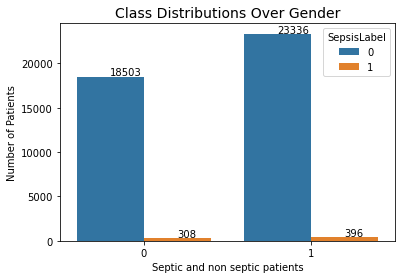

In [1202]:
#dataframe_all = dataframe_all.replace({'Gender': {0: 'Male', 1: 'Female'}})
axe = sns.countplot(data=dataframe_all, x='Gender', hue='SepsisLabel')  

for x in axe.patches:
    x_axe = x.get_x() + x.get_width() / 2 
    y_axe = x.get_height()
    axe.annotate(format(y_axe),(x_axe, y_axe), xytext=(0, 1),textcoords="offset points") 
axe.set_xlabel('Septic and non septic patients')
axe.set_ylabel('Number of Patients')
plt.title('Class Distributions Over Gender', fontsize=14)  
plt.savefig('Class Distribution over gender.png')

In [1203]:
Counter(dataframe_all['SepsisLabel'])

Counter({0: 41839, 1: 704})

In [1204]:
print('Non-septic patients', round(dataframe_all['SepsisLabel'].value_counts()[0]/len(dataframe_all) * 100,2), '% of the dataset')
print('Septic patients', round(dataframe_all['SepsisLabel'].value_counts()[1]/len(dataframe_all) * 100,2), '% of the dataset')

Non-septic patients 98.35 % of the dataset
Septic patients 1.65 % of the dataset


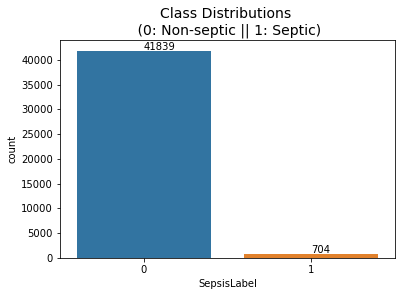

In [1205]:
colors = ["#0101DF", "#DF0101"]

axe = sns.countplot(x=dataframe_all['SepsisLabel'], data=dataframe_all)
plt.title('Class Distributions \n (0: Non-septic || 1: Septic)', fontsize=14)
for x in axe.patches:
    x_axe = x.get_x() + x.get_width() / 2
    y_axe = x.get_height()
    axe.annotate(format(y_axe), (x_axe, y_axe), xytext=(0, 1), textcoords="offset points")    
plt.savefig('Class_Disstribution.png')
plt.show()

In [1206]:
Counter(dataframe_all['SepsisLabel'])

Counter({0: 41839, 1: 704})

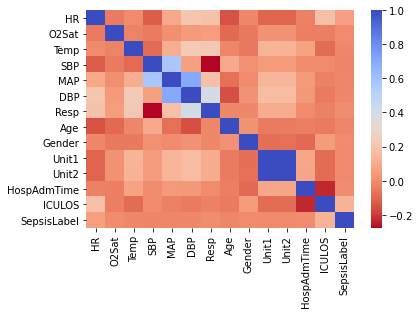

In [1207]:
# correlation matrix
corr = dataframe_all.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.savefig('Correlation_matrix.png')
plt.show()

In [1208]:
dataframe_all.shape

(42543, 14)

In [1209]:
Counter(dataframe_all['SepsisLabel'])

Counter({0: 41839, 1: 704})

In [1210]:
# Detect outliers using the z-score method
z = np.abs(stats.zscore(dataframe_all.loc[:, dataframe_all.columns != 'SepsisLabel']))
outliers = np.where(z > 3)
#Delete the outliers
dataframe_all = dataframe_all.drop(dataframe_all.loc[:, dataframe_all.columns != 'SepsisLabel'].index[outliers[0]])

In [1211]:
Counter(dataframe_all['SepsisLabel'])

Counter({0: 39406, 1: 606})

In [1212]:
dataframe_all['Age'] = dataframe_all['Age'].astype("int")

In [1213]:
dataframe_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40012 entries, 0 to 38876
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HR           40012 non-null  float64
 1   O2Sat        40012 non-null  float64
 2   Temp         40012 non-null  float64
 3   SBP          40012 non-null  float64
 4   MAP          40012 non-null  float64
 5   DBP          40012 non-null  float64
 6   Resp         40012 non-null  float64
 7   Age          40012 non-null  int64  
 8   Gender       40012 non-null  int64  
 9   Unit1        40012 non-null  float64
 10  Unit2        40012 non-null  float64
 11  HospAdmTime  40012 non-null  float64
 12  ICULOS       40012 non-null  int64  
 13  SepsisLabel  40012 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 4.6 MB


In [1214]:

from collections import Counter
Counter(dataframe_all["SepsisLabel"]) 
X = dataframe_all.drop("SepsisLabel",axis=1)
y = dataframe_all["SepsisLabel"]


In [1215]:
Counter(y)


Counter({0: 39406, 1: 606})

In [1216]:
dataframe_all.head()


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,98.0,98.0,98.0,98.0,98.00,98.0,98.0,83,0,98.0,98.0,-0.03,1,0
1,97.0,95.0,98.0,98.0,75.33,98.0,19.0,83,0,98.0,98.0,-0.03,2,0
2,89.0,99.0,98.0,122.0,86.00,98.0,22.0,83,0,98.0,98.0,-0.03,3,0
3,90.0,95.0,98.0,98.0,98.00,98.0,30.0,83,0,98.0,98.0,-0.03,4,0
5,110.0,91.0,98.0,98.0,98.00,98.0,22.0,83,0,98.0,98.0,-0.03,6,0


In [1217]:
X.shape, y.shape

((40012, 13), (40012,))

In [1218]:
#Split the data into train and test data set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [1219]:
X_train

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS
13806,100.0,98.5,37.50,110.0,70.0,51.0,18.0,61,1,0.0,1.0,-141.65,35
10770,101.0,99.0,36.10,146.0,121.0,104.0,20.0,30,0,1.0,0.0,-7.81,8
28847,98.0,98.0,98.00,98.0,98.0,98.0,98.0,66,1,98.0,98.0,-2.94,16
3244,98.0,98.0,98.00,98.0,98.0,98.0,98.0,69,1,98.0,98.0,-2.89,45
17026,98.0,98.0,98.00,98.0,98.0,98.0,98.0,100,1,1.0,0.0,-180.74,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18424,86.0,97.0,98.00,135.0,87.0,60.0,23.0,49,0,0.0,1.0,-11.63,22
30239,98.5,96.5,37.80,143.0,97.5,67.0,22.5,79,1,0.0,1.0,-0.04,2
28512,114.0,99.0,98.00,124.0,95.0,80.0,36.0,61,1,0.0,1.0,-527.24,8
18915,106.0,95.0,98.00,107.0,80.0,67.0,26.0,22,0,1.0,0.0,-11.43,4


In [1220]:
X.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'Age', 'Gender',
       'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS'],
      dtype='object')

In [1221]:
y_train

13806    0
10770    0
28847    0
3244     0
17026    0
        ..
18424    0
30239    0
28512    0
18915    0
3066     0
Name: SepsisLabel, Length: 28008, dtype: int64

In [1222]:
Counter(y_test)

Counter({0: 11829, 1: 175})

In [1223]:
##Method 1: Over-sampling the minority class
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=1,random_state = 0)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train.ravel())
print("After OverSampling, counts of labels 1 is : {}".format(sum(y_train_SMOTE == 1)))
print("After OverSampling, counts of labels 1 is : {}".format(sum(y_train_SMOTE == 0)))


After OverSampling, counts of labels 1 is : 27577
After OverSampling, counts of labels 1 is : 27577


In [1225]:
y_train_SMOTE

array([0, 0, 0, ..., 1, 1, 1])

In [970]:
#Method 2 : downsampling the majority class 
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_undersample, y_train_undersample = undersample.fit_resample(X_train, y_train)
print(Counter(y_train_undersample)) #join the majority and minority filtered samples
print("After UnderSampling, counts of labels 1 is : {}".format(sum(y_train_undersample== 1)))
print("After UnderSampling, counts of labels 1 is : {}".format(sum(y_train_undersample == 0)))

Counter({0: 431, 1: 431})
After UnderSampling, counts of labels 1 is : 431
After UnderSampling, counts of labels 1 is : 431


In [971]:
#Method 3 : Combine the over and downsampling techniques 
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X_train_smotetomek, y_train_smotetomek = smt.fit_resample(X_train, y_train)
X_train_smotetomek.shape,y_train_smotetomek.shape
print("After ReSampling with SMOTETOMEK, counts of label '1': {}".format(sum(y_train_smotetomek == 1))) 
print("After ReSampling with SMOTETOME, counts of label '0': {}".format(sum(y_train_smotetomek == 0))) 


After ReSampling with SMOTETOMEK, counts of label '1': 27571
After ReSampling with SMOTETOME, counts of label '0': 27571


In [972]:
#functions to generate accuracy report
def evaluation_score (y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred) 
    print("Confusion Matrix \n", cm)
    print("Classification Report \n", classification_report(y_test,y_pred))

In [973]:
def Plotting(Plots_title, Acc, Pre, Sens, Spec):
    
    plot = plt.figure()
    axes = plot.add_axes([0,0,1,1])
    metrics = ['Accuracy',  'Precision', 'Sensitivity','Specificty']
    values = [Acc, Pre, Sens, Spec]
    barlist = axes.bar(metrics,values, width=0.5)
    barlist[0].set_color('royalblue')
    barlist[1].set_color('green')
    barlist[2].set_color('orange')
    barlist[3].set_color('yellow')
    axes.set_yticks(np.arange(0, 1.25, 0.5))
    axes.set_title(Plots_title)
    def autolabel(rects):
        for idx,rect in enumerate(barlist):
            height = rect.get_height()
            axes.text(rect.get_x() + rect.get_width()/2., 1*height,
                    round(values[idx],3),
                    ha='center', va='bottom', rotation=0)

    autolabel(barlist)
    plt.show()


In [974]:
# Parameters tuning 
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

from sklearn.model_selection import RandomizedSearchCV
parameters = [{'max_depth':[10, 100, 500, 1000], 'criterion': ['gini','entropy'],'min_samples_split':[2,3,4,5,6,7,8,9,10],'min_samples_leaf':[1,2,3,4,5],'min_impurity_decrease':[0,1,2,3,4,5]}]
param_search = RandomizedSearchCV(estimator = rf_model,param_distributions = parameters,scoring = 'accuracy',cv = 3)


#RF with no resampling (NR)

param_search = param_search.fit(X_train, y_train)
best_accuracy = param_search.best_score_
best_parameters = param_search.best_params_
print("The best accuracy without resampling:", best_accuracy)
print("The best paramters without resampling", best_parameters)

rf_model_NR = RandomForestClassifier(criterion = best_parameters['criterion'],
                                  max_depth = best_parameters['max_depth'],
                                  min_impurity_decrease = best_parameters['min_impurity_decrease'],
                                  min_samples_leaf = best_parameters['min_samples_leaf'],
                                  min_samples_split = best_parameters['min_samples_split'])





The best accuracy without resampling: 0.9859325906883747
The best paramters without resampling {'min_samples_split': 6, 'min_samples_leaf': 2, 'min_impurity_decrease': 0, 'max_depth': 500, 'criterion': 'entropy'}


In [975]:
#RF with Smote


param_search_SMOTE = param_search.fit(X_train_SMOTE, y_train_SMOTE)
best_accuracy_SMOTE = param_search_SMOTE.best_score_
best_parameters_SMOTE = param_search_SMOTE.best_params_
print("The best accuracy using SMOTE :", best_accuracy_SMOTE)
print("The best paramters using SMOTE ", best_parameters_SMOTE)

from sklearn.ensemble import RandomForestClassifier
rf_model_SMOTE = RandomForestClassifier(criterion = best_parameters_SMOTE['criterion'],
                                  max_depth = best_parameters_SMOTE['max_depth'],
                                  min_impurity_decrease = best_parameters_SMOTE['min_impurity_decrease'],
                                  min_samples_leaf = best_parameters_SMOTE['min_samples_leaf'],
                                  min_samples_split = best_parameters_SMOTE['min_samples_split'])


The best accuracy using SMOTE : 0.9941799295899939
The best paramters using SMOTE  {'min_samples_split': 7, 'min_samples_leaf': 4, 'min_impurity_decrease': 0, 'max_depth': 100, 'criterion': 'gini'}


In [1228]:
# Save for next models
import joblib

# save
joblib.dump(rf_model_SMOTE, "my_random_forest.joblib")


['my_random_forest.joblib']

In [976]:
#Rf with Undersampling 

param_search_undersample = param_search.fit(X_train_undersample, y_train_undersample)
best_accuracy_undersample = param_search.best_score_
best_parameters_undersample = param_search_undersample.best_params_
print("The best accuracy after undersampling:", best_accuracy_undersample)
print("The best paramters after undersampling", best_parameters_undersample)


rf_model_undersample = RandomForestClassifier(criterion = best_parameters_undersample['criterion'],
                                  max_depth = best_parameters_undersample['max_depth'],
                                  min_impurity_decrease = best_parameters_undersample['min_impurity_decrease'],
                                  min_samples_leaf = best_parameters_undersample['min_samples_leaf'],
                                  min_samples_split = best_parameters_undersample['min_samples_split'])


The best accuracy after undersampling: 0.79352577751968
The best paramters after undersampling {'min_samples_split': 6, 'min_samples_leaf': 3, 'min_impurity_decrease': 0, 'max_depth': 10, 'criterion': 'entropy'}


In [977]:
# Rf with smotetomek 
param_search_smotetomek = param_search.fit(X_train_smotetomek, y_train_smotetomek)
best_accuracy_smotetomek = param_search_smotetomek.best_score_
best_parameters_smotetomek = param_search_smotetomek.best_params_
print("The best accuracy using smotetomek:", best_accuracy)
print("The best paramters using smotetomek", best_parameters)

from sklearn.ensemble import RandomForestClassifier
rf_model_smotetomek = RandomForestClassifier(criterion = best_parameters_smotetomek['criterion'],
                                  max_depth = best_parameters_smotetomek['max_depth'],
                                  min_impurity_decrease = best_parameters_smotetomek['min_impurity_decrease'],
                                  min_samples_leaf = best_parameters_smotetomek['min_samples_leaf'],
                                  min_samples_split = best_parameters_smotetomek['min_samples_split'])


The best accuracy using smotetomek: 0.9859325906883747
The best paramters using smotetomek {'min_samples_split': 6, 'min_samples_leaf': 2, 'min_impurity_decrease': 0, 'max_depth': 500, 'criterion': 'entropy'}


Confusion Matrix 
 [[11828     1]
 [  133    42]]
Classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     11829
           1       0.98      0.24      0.39       175

    accuracy                           0.99     12004
   macro avg       0.98      0.62      0.69     12004
weighted avg       0.99      0.99      0.99     12004



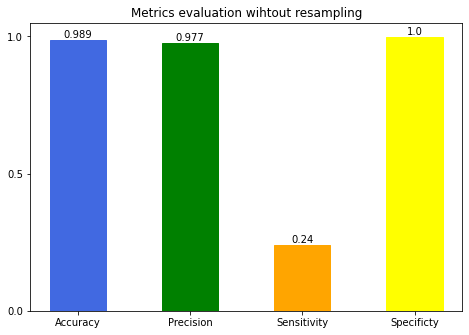

<Figure size 432x288 with 0 Axes>

In [978]:
#evaluations of four model: rf_model/ rf_model_SMOTe/rf_model_undersampling / rf_model_oversampling
rf_model_NR = rf_model.fit(X_train,y_train)
y_pred = rf_model_NR.predict(X_test)
evaluation_score(y_test,y_pred)

def specificity_score (y_test,y_pred):
    cm=confusion_matrix(y_test,y_pred)
    TN, FP, FN, TP = cm.ravel()
    specificity = TN / (TN+FP)
    return specificity

cm=confusion_matrix(y_test,y_pred)
TN, FP, FN, TP = cm.ravel()
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)
Plotting("Metrics evaluation wihtout resampling", accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred),specificity_score(y_test,y_pred)) 


plt.savefig('rf_model_with_no_resampling.png')

Confusion Matrix 
 [[11810    19]
 [   71   104]]
Classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     11829
           1       0.85      0.59      0.70       175

    accuracy                           0.99     12004
   macro avg       0.92      0.80      0.85     12004
weighted avg       0.99      0.99      0.99     12004



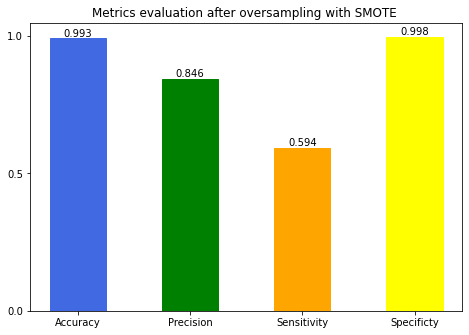

<Figure size 432x288 with 0 Axes>

In [979]:
rf_model_SMOTE = rf_model.fit(X_train_SMOTE,y_train_SMOTE)
y_pred_SMOTE = rf_model_SMOTE.predict(X_test)
evaluation_score(y_test,y_pred_SMOTE)

cm_SMOTE=confusion_matrix(y_test,y_pred_SMOTE)
TN, FP, FN, TP = cm.ravel()
pd.crosstab(y_test, y_pred_SMOTE, rownames = ['Actual'], colnames =['Predicted'], margins = True)
Plotting("Metrics evaluation after oversampling with SMOTE ", accuracy_score(y_test,y_pred_SMOTE),precision_score(y_test,y_pred_SMOTE),recall_score(y_test,y_pred_SMOTE),specificity_score(y_test,y_pred_SMOTE)) 
plt.savefig('rf_model_with_SMOTE.png')

In [1170]:
y_train_SMOTE


array([0, 0, 0, ..., 1, 1, 1])

Confusion Matrix 
 [[10462  1367]
 [   19   156]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.88      0.94     11829
           1       0.10      0.89      0.18       175

    accuracy                           0.88     12004
   macro avg       0.55      0.89      0.56     12004
weighted avg       0.99      0.88      0.93     12004



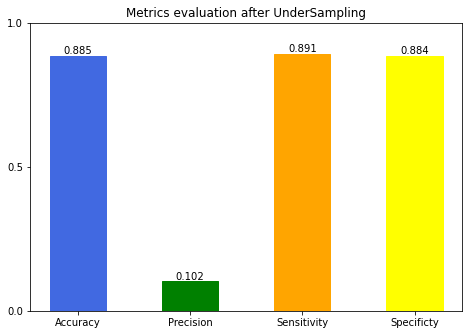

Accuracy: 0.884538487170943 
precision: 0.10242941562705186 
Recall: 0.8914285714285715 
Specificity: 0.8844365542311269


<Figure size 432x288 with 0 Axes>

In [980]:
rf_model_undersample = rf_model.fit(X_train_undersample,y_train_undersample)
y_pred_undersample = rf_model_undersample.predict(X_test)
evaluation_score(y_test,y_pred_undersample)

cm_undersample =confusion_matrix(y_test,y_pred_undersample)
TN, FP, FN, TP = cm.ravel()
pd.crosstab(y_test, y_pred_undersample, rownames = ['Actual'], colnames =['Predicted'], margins = True)
Plotting("Metrics evaluation after UnderSampling", accuracy_score(y_test,y_pred_undersample),precision_score(y_test,y_pred_undersample),recall_score(y_test,y_pred_undersample),specificity_score(y_test,y_pred_undersample)) 
print('Accuracy:', accuracy_score(y_test,y_pred_undersample),'\nprecision:', precision_score(y_test,y_pred_undersample),
     '\nRecall:', recall_score(y_test,y_pred_undersample),'\nSpecificity:', specificity_score(y_test,y_pred_undersample))
plt.savefig('rf_model_with_undersampling.png')

Confusion Matrix 
 [[11806    23]
 [   76    99]]
Classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     11829
           1       0.81      0.57      0.67       175

    accuracy                           0.99     12004
   macro avg       0.90      0.78      0.83     12004
weighted avg       0.99      0.99      0.99     12004



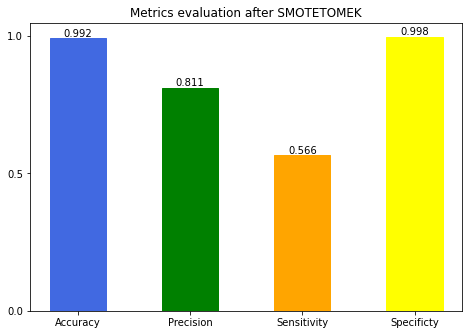

Accuracy: 0.9917527490836388 
precision: 0.8114754098360656 
Recall: 0.5657142857142857 
Specificity: 0.9980556260038888


<Figure size 432x288 with 0 Axes>

In [981]:
rf_model_smotetomek = rf_model.fit(X_train_smotetomek,y_train_smotetomek)
y_pred_smotetomek = rf_model_smotetomek.predict(X_test)
evaluation_score(y_test,y_pred_smotetomek)

confusion_matrix(y_test,y_pred_smotetomek)
pd.crosstab(y_test, y_pred_smotetomek, rownames = ['Actual'], colnames =['Predicted'], margins = True)
Plotting("Metrics evaluation after SMOTETOMEK", accuracy_score(y_test,y_pred_smotetomek),precision_score(y_test,y_pred_smotetomek),recall_score(y_test,y_pred_smotetomek),specificity_score(y_test,y_pred_smotetomek)) 
print('Accuracy:', accuracy_score(y_test,y_pred_smotetomek),'\nprecision:', precision_score(y_test,y_pred_smotetomek),
     '\nRecall:', recall_score(y_test,y_pred_smotetomek),'\nSpecificity:', specificity_score(y_test,y_pred_smotetomek))
plt.savefig('rf_model_with_SMOTETOMEK.png')

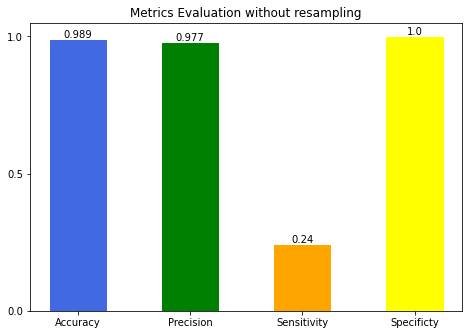

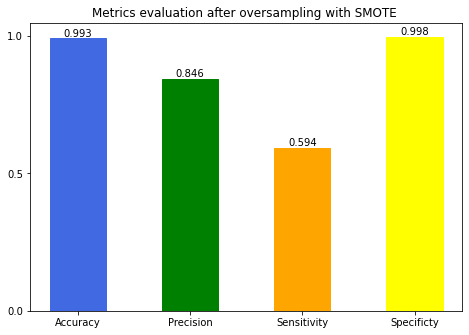

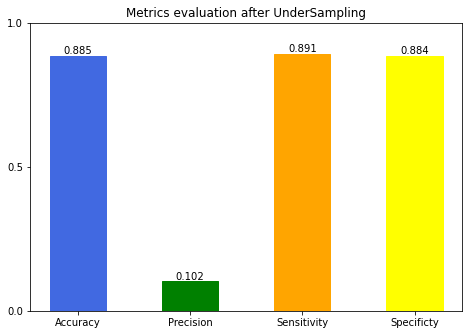

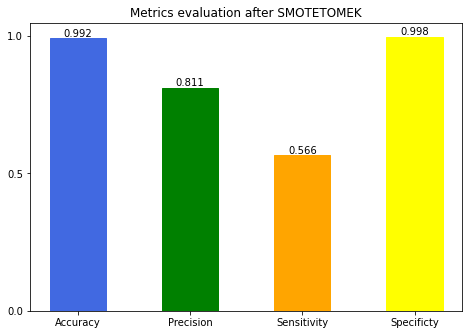

In [982]:
Plotting("Metrics Evaluation without resampling", accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred),specificity_score(y_test,y_pred)) 


Plotting("Metrics evaluation after oversampling with SMOTE ", accuracy_score(y_test,y_pred_SMOTE),precision_score(y_test,y_pred_SMOTE),recall_score(y_test,y_pred_SMOTE),specificity_score(y_test,y_pred_SMOTE)) 


Plotting("Metrics evaluation after UnderSampling", accuracy_score(y_test,y_pred_undersample),precision_score(y_test,y_pred_undersample),recall_score(y_test,y_pred_undersample),specificity_score(y_test,y_pred_undersample)) 


Plotting("Metrics evaluation after SMOTETOMEK", accuracy_score(y_test,y_pred_smotetomek),precision_score(y_test,y_pred_smotetomek),recall_score(y_test,y_pred_smotetomek),specificity_score(y_test,y_pred_smotetomek)) 



In [1046]:
print(Counter((X_test)))


Counter({'HR': 1, 'O2Sat': 1, 'Temp': 1, 'SBP': 1, 'MAP': 1, 'DBP': 1, 'Resp': 1, 'Age': 1, 'Gender': 1, 'Unit1': 1, 'Unit2': 1, 'HospAdmTime': 1, 'ICULOS': 1, 'AgeGroup': 1})


In [1047]:
X_test

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,AgeGroup
5489,98.0,98.0,98.00,98.0,98.00,98.0,98.0,46,0,98.0,98.0,-4.80,19,Adult
2500,122.0,98.0,39.28,135.0,93.67,98.0,32.0,36,1,1.0,0.0,-0.02,24,Young
30561,68.0,96.0,98.00,160.0,90.00,62.0,15.0,53,1,98.0,98.0,0.00,21,Adult
1925,91.0,98.5,36.90,101.5,72.50,48.5,14.0,62,1,0.0,1.0,-93.26,41,Adult
32849,98.0,98.0,98.00,98.0,98.00,98.0,98.0,50,0,1.0,0.0,-6.05,31,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26145,127.0,94.5,38.70,86.0,70.00,60.0,5.0,58,1,0.0,1.0,-74.53,43,Adult
7717,97.0,94.0,98.00,147.0,98.00,72.0,21.0,60,0,98.0,98.0,-0.05,22,Adult
34119,76.0,100.0,36.50,88.0,80.00,77.0,17.0,60,0,98.0,98.0,-0.02,27,Adult
3206,77.0,100.0,98.00,169.0,110.33,98.0,14.0,61,0,1.0,0.0,-8.63,5,Adult


In [1180]:
y_pred_SMOTE

array([0, 0, 0, ..., 0, 0, 0])

In [1182]:
from numpy import asarray
from numpy import savetxt

# save to csv file
savetxt('y_train_SMOTE.csv', y_train_SMOTE, delimiter=',')
savetxt('X_train_SMOTE.csv', X_train_SMOTE, delimiter=',')
savetxt('y_pred_SMOTE.csv', y_pred_SMOTE, delimiter=',')
X_test.to_csv('X_test.csv')
#savetxt('X_test.csv', X_test, delimiter=',')
savetxt('y_test.csv', y_test, delimiter=',')

In [1108]:
sensitive_features = X_test[['Age','Gender']] 
sensitive_features

,Age,Gender
5489,46,0
2500,36,1
30561,53,1
1925,62,1
32849,50,0
...,...,...
26145,58,1
7717,60,0
34119,60,0
3206,61,0


In [1109]:
sensitive_features = X_test[['Age','Gender']] 

#Define target variable 
sensitive_features['y_true'] =  y_test
#Define the predicted values
sensitive_features['y_pred'] = y_pred_SMOTE


In [1110]:
sensitive_features

,Age,Gender,y_true,y_pred
5489,46,0,0,0
2500,36,1,0,0
30561,53,1,0,0
1925,62,1,0,0
32849,50,0,0,0
...,...,...,...,...
26145,58,1,0,0
7717,60,0,0,0
34119,60,0,0,0
3206,61,0,0,0


In [1111]:
Counter(y_test)

Counter({0: 11829, 1: 175})

In [1112]:
sensitive_features['y_true'] =  y_test
sensitive_features['y_pred'] = y_pred_SMOTE

In [1142]:
def fairness_metrics(sensitive_features):
    """Calculate fairness for subgroup of population"""
    
    #Confusion Matrix
    cm=confusion_matrix(sensitive_features['y_true'],sensitive_features['y_pred'])
    TN, FP, FN, TP = cm.ravel()
    
    N = TP+FP+FN+TN #Total population
    ACC = (TP+TN)/N #Accuracy
    PPV = TP/(TP+FP) #Positive predictive value (Precison)
    TPR = TP/(TP+FN) # True positive rate
    TNR = TN/(FP+TN) # True negative rate
    return np.array([ACC, PPV, TPR, TNR])  

In [1143]:
fm_Gender_1 = fairness_metrics(sensitive_features[sensitive_features.Gender==1])
fm_Gender_0 = fairness_metrics(sensitive_features[sensitive_features.Gender==0])


In [1144]:
fm_Gender_1

array([0.99252137, 0.87719298, 0.54347826, 0.99891641])

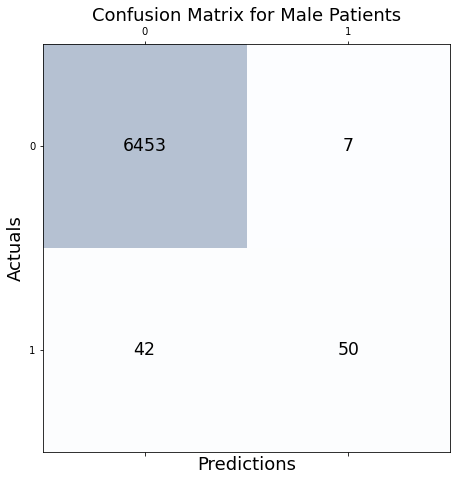

In [1145]:
cm = confusion_matrix(sensitive_features['y_true'][sensitive_features.Gender==1],sensitive_features['y_pred'][sensitive_features.Gender==1]) 
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for Male Patients', fontsize=18)
plt.savefig('cm for male patients.png')
plt.show()

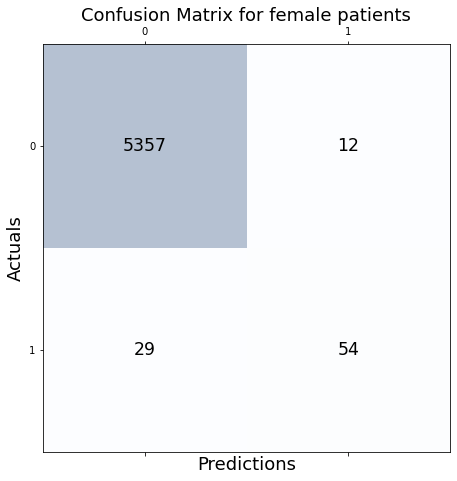

In [1146]:
cm = confusion_matrix(sensitive_features['y_true'][sensitive_features.Gender==0],sensitive_features['y_pred'][sensitive_features.Gender==0]) 
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for female patients', fontsize=18)
plt.savefig('cm for female patients.png')
plt.show()

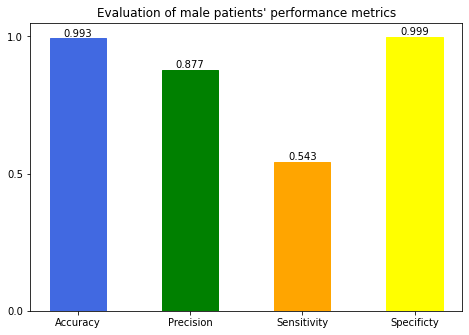

In [1147]:
Plotting("Evaluation of male patients' performance metrics", fm_Gender_1[0],fm_Gender_1[1],fm_Gender_1[2],fm_Gender_1[3])
#plt.savefig('barplots for male patients.png')

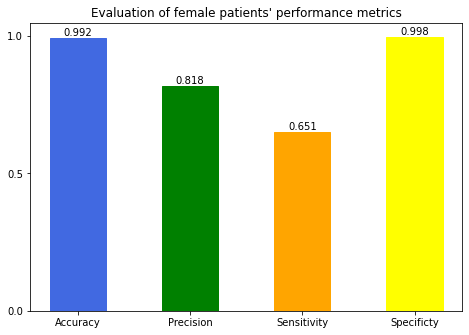

<Figure size 432x288 with 0 Axes>

In [1148]:
Plotting("Evaluation of female patients' performance metrics",fm_Gender_0[0],fm_Gender_0[1],fm_Gender_0[2],fm_Gender_0[3])
plt.savefig('barplots for female patients.png')

In [1149]:
import numpy as np
bins= [15, 40, 65, np.inf]
# (15,40] (40,65] and 60+ 
labels = ['Young','Adult','OLD']
X_test['AgeGroup'] = pd.cut(X_test['Age'], bins=bins, labels=labels)
print (X_test)


          HR  O2Sat   Temp    SBP     MAP   DBP  Resp  Age  Gender  Unit1  \
5489    98.0   98.0  98.00   98.0   98.00  98.0  98.0   46       0   98.0   
2500   122.0   98.0  39.28  135.0   93.67  98.0  32.0   36       1    1.0   
30561   68.0   96.0  98.00  160.0   90.00  62.0  15.0   53       1   98.0   
1925    91.0   98.5  36.90  101.5   72.50  48.5  14.0   62       1    0.0   
32849   98.0   98.0  98.00   98.0   98.00  98.0  98.0   50       0    1.0   
...      ...    ...    ...    ...     ...   ...   ...  ...     ...    ...   
26145  127.0   94.5  38.70   86.0   70.00  60.0   5.0   58       1    0.0   
7717    97.0   94.0  98.00  147.0   98.00  72.0  21.0   60       0   98.0   
34119   76.0  100.0  36.50   88.0   80.00  77.0  17.0   60       0   98.0   
3206    77.0  100.0  98.00  169.0  110.33  98.0  14.0   61       0    1.0   
5111    80.0   97.5  98.00  114.0   90.00  76.0  23.0   66       1    1.0   

       Unit2  HospAdmTime  ICULOS AgeGroup  
5489    98.0        -4.80     

In [1150]:
Counter(X_test['AgeGroup'])
sensitive_features = X_test[['Age','Gender','AgeGroup']]

In [1151]:
print(sensitive_features)

       Age  Gender AgeGroup
5489    46       0    Adult
2500    36       1    Young
30561   53       1    Adult
1925    62       1    Adult
32849   50       0    Adult
...    ...     ...      ...
26145   58       1    Adult
7717    60       0    Adult
34119   60       0    Adult
3206    61       0    Adult
5111    66       1      OLD

[12004 rows x 3 columns]


In [1152]:
sensitive_features['y_true'] =  y_test
sensitive_features['y_pred'] = y_pred_SMOTE

In [1153]:
Young = fairness_metrics(sensitive_features[sensitive_features.AgeGroup=='Young'])
Adult = fairness_metrics(sensitive_features[sensitive_features.AgeGroup=='Adult'])
OLD = fairness_metrics(sensitive_features[sensitive_features.AgeGroup=='OLD'])


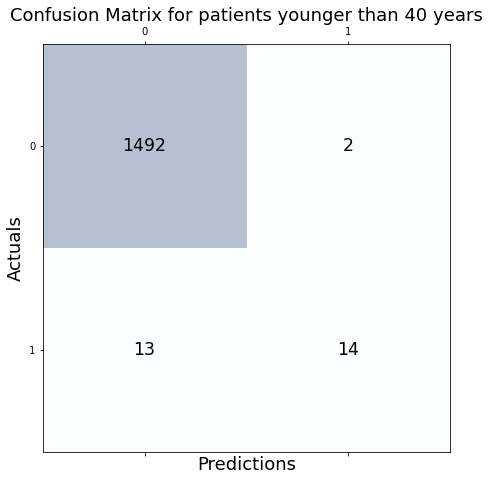

In [1154]:
cm = confusion_matrix(sensitive_features['y_true'][sensitive_features.AgeGroup=='Young'],sensitive_features['y_pred'][sensitive_features.AgeGroup=='Young']) 
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for patients younger than 40 years', fontsize=18)
plt.savefig('cm for young patients.png')
plt.show()

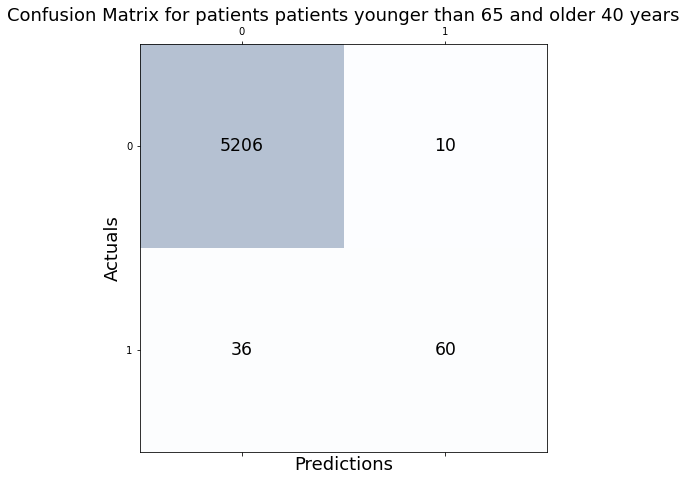

In [1155]:
cm = confusion_matrix(sensitive_features['y_true'][sensitive_features.AgeGroup=='Adult'],sensitive_features['y_pred'][sensitive_features.AgeGroup=='Adult']) 
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for patients patients younger than 65 and older 40 years', fontsize=18)
plt.savefig('cm for adult patients.png')
plt.show()

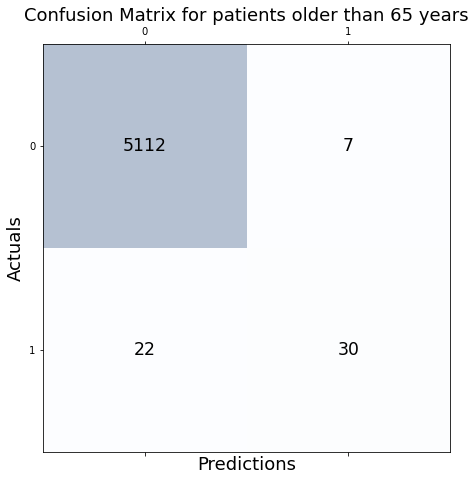

In [1156]:
cm = confusion_matrix(sensitive_features['y_true'][sensitive_features.AgeGroup=='OLD'],sensitive_features['y_pred'][sensitive_features.AgeGroup=='OLD']) 
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for patients older than 65 years', fontsize=18)
plt.savefig('cm for senior patients.png')
plt.show()

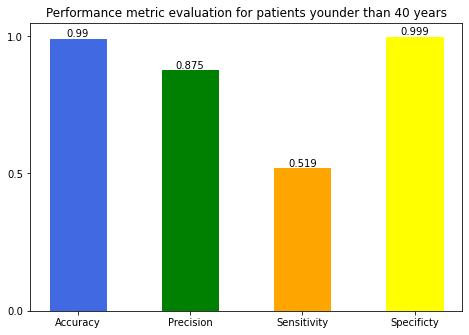

<Figure size 432x288 with 0 Axes>

In [1157]:
Plotting("Performance metric evaluation for patients younder than 40 years",Young[0],Young[1],Young[2],Young[3])
plt.savefig('metrics for young patients.png')


In [1158]:
Young

array([0.99013807, 0.875     , 0.51851852, 0.99866131])

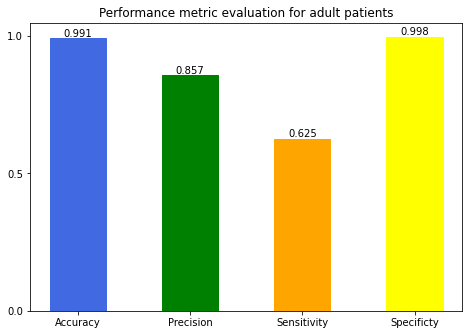

<Figure size 432x288 with 0 Axes>

In [1159]:
Plotting("Performance metric evaluation for adult patients",Adult[0],Adult[1],Adult[2],Adult[3])
plt.savefig('metrics for adult patients.png')

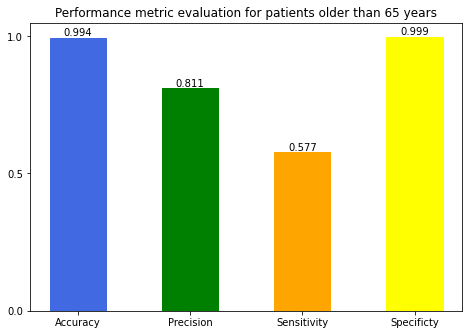

<Figure size 432x288 with 0 Axes>

In [1160]:
Plotting("Performance metric evaluation for patients older than 65 years",OLD[0],OLD[1],OLD[2],OLD[3])
plt.savefig('metrics for senior patients.png')

In [1161]:
#Evaluation of both age and gender together

pd.crosstab(sensitive_features.AgeGroup, sensitive_features['Gender'])
sensitive_features["Young_Male"] = np.where((sensitive_features.AgeGroup=='Young') &
                                   (sensitive_features.Gender==1),1,0)
sensitive_features["Adult_Male"] = np.where((sensitive_features.AgeGroup=='Adult') &
                                   (sensitive_features.Gender==1),1,0)
sensitive_features["Old_Male"] = np.where((sensitive_features.AgeGroup=='OLD') &
                                   (sensitive_features.Gender==1),1,0)
sensitive_features["Young_Female"] = np.where((sensitive_features.AgeGroup=='Young') &
                                   (sensitive_features.Gender==0),1,0)
sensitive_features["Adult_Female"] = np.where((sensitive_features.AgeGroup=='Adult') &
                                   (sensitive_features.Gender==0),1,0)
sensitive_features["Old_Female"] = np.where((sensitive_features.AgeGroup=='OLD') &
                                   (sensitive_features.Gender==0),1,0)
Young_Male = fairness_metrics(sensitive_features[sensitive_features.Young_Male==1])
Adult_Male = fairness_metrics(sensitive_features[sensitive_features.Adult_Male==1])
Old_Male = fairness_metrics(sensitive_features[sensitive_features.Old_Male ==1])
Young_Female = fairness_metrics(sensitive_features[sensitive_features.Young_Female ==1])
Adult_Female = fairness_metrics(sensitive_features[sensitive_features.Adult_Female ==1])
Old_Female = fairness_metrics(sensitive_features[sensitive_features.Old_Female ==1])


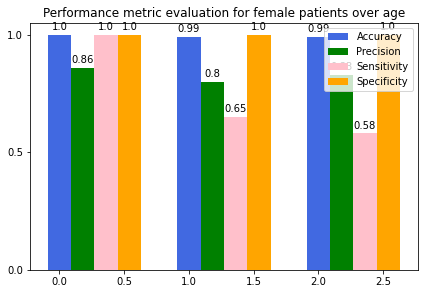

<Figure size 432x288 with 0 Axes>

In [1229]:
import matplotlib.pyplot as plt
fig, axe = plt.subplots()
index = np.arange(3)  
width = 0.18   # the width of the bars
axe.set_yticks(np.arange(0, 1.25, 0.5))
Accuracy = [round(Young_Female[0],2),round(Adult_Female[0],2),round(Old_Female[0],2)]
plts1 = plt.bar(index + 0.00, Accuracy, width, color='royalblue', label = 'Accuracy')
Precision = [round(Young_Female[1],2),round(Adult_Female[1],2),round(Old_Female[1],2)]
plts2 = plt.bar(index + width, Precision, width, color='green', label= 'Precision')
Sensitivity = [round(Young_Female[2],2),round(Adult_Female[2],2),round(Old_Female[2],2)]
plts3 = plt.bar(index +width*2, Sensitivity, width, color='pink', label = 'Sensitivity')
Specificity= [round(Young_Female[3],2),round(Adult_Female[3],2),round(Old_Female[3],2)]
plts4 = plt.bar(index +width*3, Specificity, width, color='orange', label = 'Specificity')

ax.set_ylabel('Metrics')
ax.set_xticks(index+width)
ax.set_xticklabels( ('Young', 'Adult', 'Old'))
plt.legend()
def autolabel(plts):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in plts:
        height = rect.get_height()
        axe.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
      
    
 
autolabel(plts1)
autolabel(plts2)
autolabel(plts3)
autolabel(plts4)
fig.tight_layout()
plt.title('Performance metric evaluation for female patients over age') 
plt.show()
plt.savefig('metrics for female patients with differents ages .png')

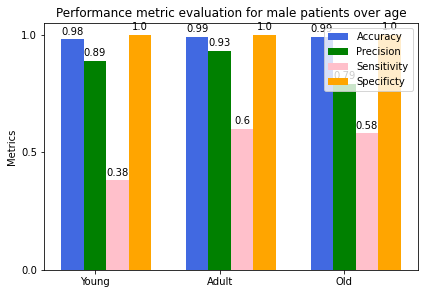

In [1163]:
index = np.arange(3)  # the x locations for the groups
width = 0.18   # the width of the bars
fig, axe = plt.subplots()
axe.set_yticks(np.arange(0, 1.25, 0.5))
 #ax.set_title('Evaluation metrics for young patients')
Accuracy = [round(Young_Male[0],2),round(Adult_Male[0],2),round(Old_Male[0],2)]
rects1 = plt.bar(index + 0.00, Accuracy, width, color='royalblue', label = 'Accuracy')
Precision = [round(Young_Male[1],2),round(Adult_Male[1],2),round(Old_Male[1],2)]
rects2 = plt.bar(index + width, Precision, width, color='green',label ='Precision')
Sensitivity = [round(Young_Male[2],2),round(Adult_Male[2],2),round(Old_Male[2],2)]
rects3 = plt.bar(index +width*2, Sensitivity, width, color='pink', label='Sensitivity')
Specificity= [round(Young_Male[3],2),round(Adult_Male[3],2),round(Old_Male[3],2)]
rects4 = plt.bar(index +width*3, Specificity, width, color='orange', label='Specificty')

axe.set_ylabel('Metrics')
axe.set_xticks(index +width)
axe.set_xticklabels( ('Young', 'Adult', 'Old'))
plt.legend()
def autolabel(rects):
    """Attach a value label above each bar """
    for rect in rects:
        height = rect.get_height()
        axe.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')
         
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
fig.tight_layout()
plt.title('Performance metric evaluation for male patients over age')
plt.savefig('metrics for male patients with differents ages .png')
plt.show()

In [1164]:
def evaluation_metrics(sensitive_features):
    
    #Confusion Matrix
    cm=confusion_matrix(sensitive_features['y_true'],sensitive_features['y_pred'])
    print(cm)
    TN, FP, FN, TP = cm.ravel() 
    
    N = TP+FP+FN+TN #Total population
    ACC = (TP+TN)/N #Accuracy
    PPV = TP/(TP+FP) #Positive predictive value (Precison)
    TPR = TP/(TP+FN) # True positive rate
    FPR = FP/(FP+TN) # False positive rate
    TNR = TN/(FP + TN) # True negative rate
    FNR = FN /(FN +TP) # False negative rate
    FDR = 1 - PPV # False discovery rate
    df_metrics = [{'Acc': (TP+TN)/N, 'PPV': TP/(TP+FP), 'TPR' : TP/(TP+FN), 'FPR' : FP/(FP+TN), 'TNR' : TN/(FP + TN), 'FNR' : FN /(FN +TP), 'FDR' : 1 - PPV  }]
  
    return df_metrics

In [1165]:
Male = evaluation_metrics(sensitive_features[sensitive_features.Gender==1])
Female= evaluation_metrics(sensitive_features[sensitive_features.Gender==0])
data_metrics_Male = pd.DataFrame(Male, index= ['Men'])
data_metrics_Female = pd.DataFrame(Female, index= ['Women'])

[[6453    7]
 [  42   50]]
[[5357   12]
 [  29   54]]


In [1166]:
pd.concat([data_metrics_Male, data_metrics_Female])

,Acc,PPV,TPR,FPR,TNR,FNR,FDR
Men,0.992521,0.877193,0.543478,0.001084,0.998916,0.456522,0.122807
Women,0.992480,0.818182,0.650602,0.002235,0.997765,0.349398,0.181818


In [1138]:
Youngs = evaluation_metrics(sensitive_features[sensitive_features.AgeGroup=='Young'])
Adults = evaluation_metrics(sensitive_features[sensitive_features.AgeGroup=='Adult'])
OLDs = evaluation_metrics(sensitive_features[sensitive_features.AgeGroup=='OLD'])
data_metrics_Youngs = pd.DataFrame(Youngs, index= ['Youngs'])
data_metrics_Adults = pd.DataFrame(Adults, index= ['Adults'])
data_metrics_Olds = pd.DataFrame(OLDs, index= ['Seniors'])


[[1492    2]
 [  13   14]]
[[5206   10]
 [  36   60]]
[[5112    7]
 [  22   30]]


In [1139]:
pd.concat([data_metrics_Male, data_metrics_Female, data_metrics_Youngs, data_metrics_Adults, data_metrics_Olds])

,Acc,PPV,TPR,FPR,TNR,FNR,FDR
Men,0.992521,0.877193,0.543478,0.001084,0.998916,0.456522,0.122807
Women,0.992480,0.818182,0.650602,0.002235,0.997765,0.349398,0.181818
Youngs,0.990138,0.875000,0.518519,0.001339,0.998661,0.481481,0.125000
Adults,0.991340,0.857143,0.625000,0.001917,0.998083,0.375000,0.142857
Seniors,0.994392,0.810811,0.576923,0.001367,0.998633,0.423077,0.189189


In [1140]:
Young_Males = evaluation_metrics(sensitive_features[sensitive_features.Young_Male==1])
Adult_Males = evaluation_metrics(sensitive_features[sensitive_features.Adult_Male==1])
Old_Males = evaluation_metrics(sensitive_features[sensitive_features.Old_Male ==1])
Young_Females = evaluation_metrics(sensitive_features[sensitive_features.Young_Female ==1])
Adult_Females = evaluation_metrics(sensitive_features[sensitive_features.Adult_Female ==1])
Old_Females = evaluation_metrics(sensitive_features[sensitive_features.Old_Female ==1])

[[662   1]
 [ 13   8]]
[[2961    2]
 [  18   27]]
[[2830    4]
 [  11   15]]
[[830   1]
 [  0   6]]
[[2245    8]
 [  18   33]]
[[2282    3]
 [  11   15]]


In [1141]:
dm_Young_Males = pd.DataFrame(Young_Males, index= ['Young_men'])
dm_Adult_Males = pd.DataFrame(Adult_Males, index= ['Adult_men'])
dm_Old_Males = pd.DataFrame(Old_Males, index= ['Senior_men'])
dm_Young_Females = pd.DataFrame(Young_Females, index= ['Young_women'])
dm_Adult_Females = pd.DataFrame(Adult_Females, index= ['Adult_women'])
dm_Old_Females = pd.DataFrame(Old_Females, index= ['Senior_women'])
pd.concat([data_metrics_Male, data_metrics_Female, data_metrics_Youngs, data_metrics_Adults, data_metrics_Olds,dm_Young_Males,dm_Adult_Males, dm_Old_Males, dm_Young_Females, dm_Adult_Females, dm_Old_Females  ])

,Acc,PPV,TPR,FPR,TNR,FNR,FDR
Men,0.992521,0.877193,0.543478,0.001084,0.998916,0.456522,0.122807
Women,0.992480,0.818182,0.650602,0.002235,0.997765,0.349398,0.181818
Youngs,0.990138,0.875000,0.518519,0.001339,0.998661,0.481481,0.125000
Adults,0.991340,0.857143,0.625000,0.001917,0.998083,0.375000,0.142857
Seniors,0.994392,0.810811,0.576923,0.001367,0.998633,0.423077,0.189189
Young_men,0.979532,0.888889,0.380952,0.001508,0.998492,0.619048,0.111111
Adult_men,0.993351,0.931034,0.600000,0.000675,0.999325,0.400000,0.068966
Senior_men,0.994755,0.789474,0.576923,0.001411,0.998589,0.423077,0.210526
Young_women,0.998805,0.857143,1.000000,0.001203,0.998797,0.000000,0.142857
Adult_women,0.988715,0.804878,0.647059,0.003551,0.996449,0.352941,0.195122
